In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_wine, fetch_california_housing


In [2]:
# PROBLEM 1: Classification using the IRIS dataset
# -------------------------------------------------------

print("\n--- PROBLEM 1: Classification on the Iris Dataset ---")

# Load the Iris dataset from seaborn
df_iris = sns.load_dataset("iris")
print(df_iris.head())

# Split into features and labels
X = df_iris.drop("species", axis=1)
y = df_iris["species"]

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define classification models
models = {
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {acc:.2f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


--- PROBLEM 1: Classification on the Iris Dataset ---
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

K-Nearest Neighbors Accuracy: 1.00
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Gaussian Naive Bayes Accuracy: 1.00
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Decision Tree Accuracy: 1.00
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Random Forest Accuracy: 1.00
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Support Vector Machine Accuracy: 1.00
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]



--- PROBLEM 2: K-Means Clustering on the Wine Dataset ---
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   

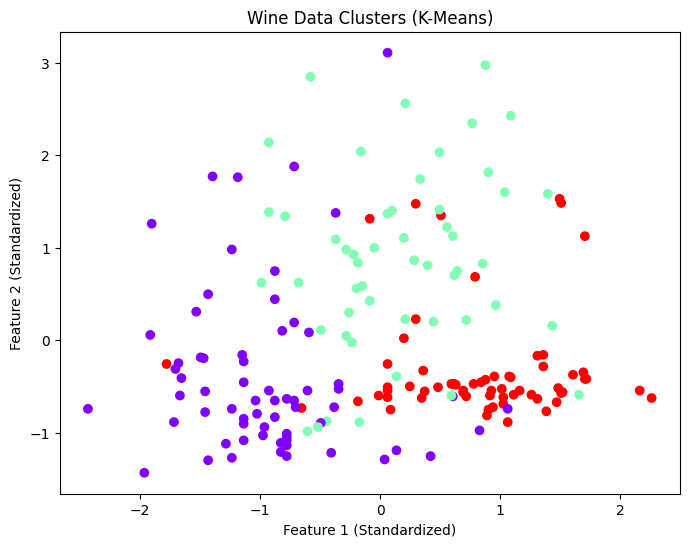

In [3]:
# PROBLEM 2: K-Means Clustering on the WINE dataset
# -------------------------------------------------------

print("\n--- PROBLEM 2: K-Means Clustering on the Wine Dataset ---")

# Load dataset
wine = load_wine()
df_wine = pd.DataFrame(wine.data, columns=wine.feature_names)
df_wine["target"] = wine.target
print(df_wine.head())

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_wine.drop("target", axis=1))

# Apply K-Means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
df_wine["cluster"] = kmeans.labels_

# Compare clusters vs true labels
print("\nConfusion Matrix (K-Means Clustering):")
print(confusion_matrix(df_wine["target"], df_wine["cluster"]))
print("\nClustering Accuracy: {:.2f}%".format(accuracy_score(df_wine["target"], df_wine["cluster"]) * 100))

# Visualization
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=kmeans.labels_, cmap="rainbow")
plt.title("Wine Data Clusters (K-Means)")
plt.xlabel("Feature 1 (Standardized)")
plt.ylabel("Feature 2 (Standardized)")
plt.show()

In [4]:
# PROBLEM 3: Linear Regression on California Housing Dataset
# -------------------------------------------------------

print("\n--- PROBLEM 3: Linear Regression on California Housing Dataset ---")

# Load dataset
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target, name="MedHouseValue")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)
print("\nModel Coefficients:")
for name, coef in zip(X.columns, model.coef_):
    print(f"{name}: {coef:.4f}")



--- PROBLEM 3: Linear Regression on California Housing Dataset ---
Mean Squared Error: 0.5558915986952438
R-squared Score: 0.5757877060324512

Model Coefficients:
MedInc: 0.4487
HouseAge: 0.0097
AveRooms: -0.1233
AveBedrms: 0.7831
Population: -0.0000
AveOccup: -0.0035
Latitude: -0.4198
Longitude: -0.4337


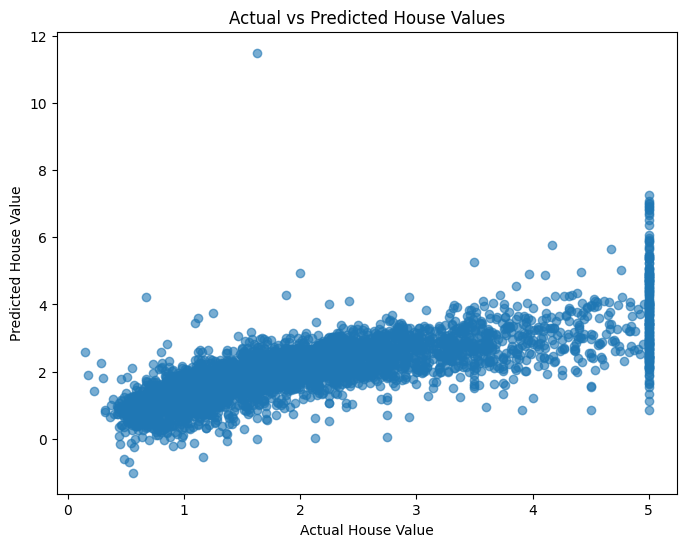


✅ Assignment 6 Completed Successfully!


In [5]:
# Scatter plot of predicted vs actual
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual House Value")
plt.ylabel("Predicted House Value")
plt.title("Actual vs Predicted House Values")
plt.show()

print("\n✅ Assignment 6 Completed Successfully!")

In [ ]:
#complete Assignment 6 – Building Machine Learning Models with Scikit-learn


--- PROBLEM 1: Classification on the Iris Dataset ---
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

K-Nearest Neighbors Accuracy: 1.00
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Gaussian Naive Bayes Accuracy: 1.00
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Decision Tree Accuracy: 1.00
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Random Forest Accuracy: 1.00
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Support Vector Machine Accuracy: 1.00
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

--- PROBLEM 2: K-Means Clustering on the Wine Dataset ---
   alcohol  malic_acid   ash  alcalinity_of_ash  m

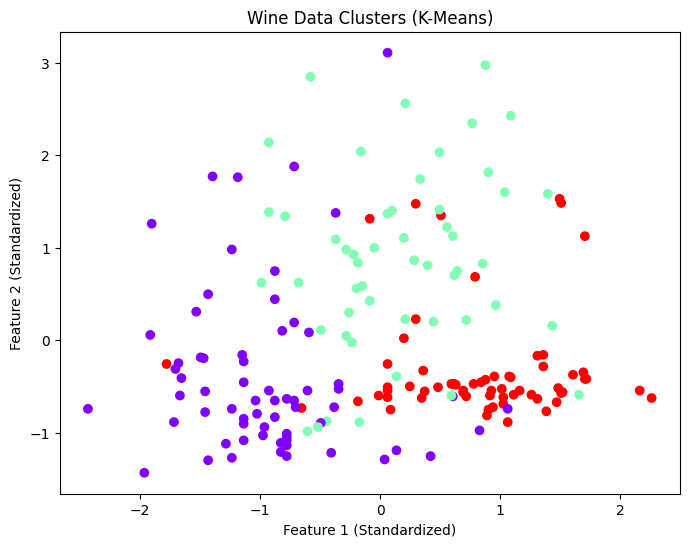


--- PROBLEM 3: Linear Regression on California Housing Dataset ---
Mean Squared Error: 0.5558915986952438
R-squared Score: 0.5757877060324512

Model Coefficients:
MedInc: 0.4487
HouseAge: 0.0097
AveRooms: -0.1233
AveBedrms: 0.7831
Population: -0.0000
AveOccup: -0.0035
Latitude: -0.4198
Longitude: -0.4337


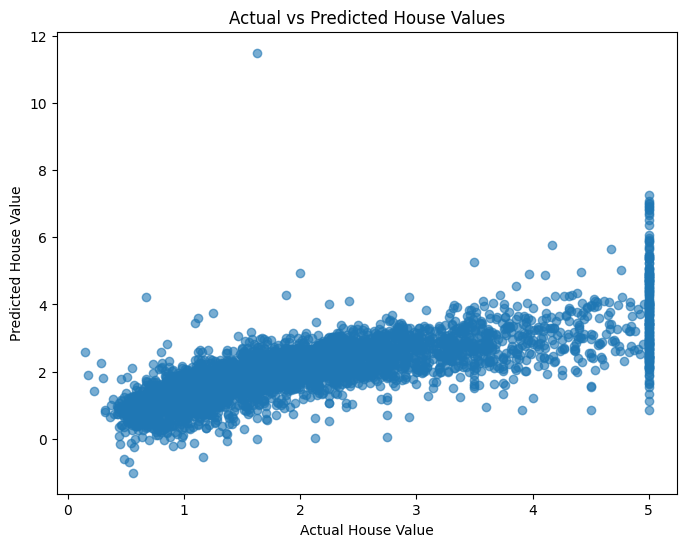


✅ Assignment 6 Completed Successfully!


In [6]:
# -------------------------------------------------------
# Assignment 6: Building Machine Learning Models with Scikit-learn
# -------------------------------------------------------

# Import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_wine, fetch_california_housing

# -------------------------------------------------------
# PROBLEM 1: Classification using the IRIS dataset
# -------------------------------------------------------

print("\n--- PROBLEM 1: Classification on the Iris Dataset ---")

# Load the Iris dataset from seaborn
df_iris = sns.load_dataset("iris")
print(df_iris.head())

# Split into features and labels
X = df_iris.drop("species", axis=1)
y = df_iris["species"]

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define classification models
models = {
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {acc:.2f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# -------------------------------------------------------
# PROBLEM 2: K-Means Clustering on the WINE dataset
# -------------------------------------------------------

print("\n--- PROBLEM 2: K-Means Clustering on the Wine Dataset ---")

# Load dataset
wine = load_wine()
df_wine = pd.DataFrame(wine.data, columns=wine.feature_names)
df_wine["target"] = wine.target
print(df_wine.head())

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_wine.drop("target", axis=1))

# Apply K-Means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
df_wine["cluster"] = kmeans.labels_

# Compare clusters vs true labels
print("\nConfusion Matrix (K-Means Clustering):")
print(confusion_matrix(df_wine["target"], df_wine["cluster"]))
print("\nClustering Accuracy: {:.2f}%".format(accuracy_score(df_wine["target"], df_wine["cluster"]) * 100))

# Visualization
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=kmeans.labels_, cmap="rainbow")
plt.title("Wine Data Clusters (K-Means)")
plt.xlabel("Feature 1 (Standardized)")
plt.ylabel("Feature 2 (Standardized)")
plt.show()

# -------------------------------------------------------
# PROBLEM 3: Linear Regression on California Housing Dataset
# -------------------------------------------------------

print("\n--- PROBLEM 3: Linear Regression on California Housing Dataset ---")

# Load dataset
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target, name="MedHouseValue")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)
print("\nModel Coefficients:")
for name, coef in zip(X.columns, model.coef_):
    print(f"{name}: {coef:.4f}")

# Scatter plot of predicted vs actual
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual House Value")
plt.ylabel("Predicted House Value")
plt.title("Actual vs Predicted House Values")
plt.show()

print("\n✅ Assignment 6 Completed Successfully!")
